In [1]:
# pandas, numpy 모듈 import
import pandas as pd
import numpy as np

# 운영 체제 정보를 확인하고, matplotlib을 사용하여 그래프 그릴 준비하기
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
from selenium import webdriver
import time

In [9]:
driver = webdriver.Chrome() #교재 상에는 ()안에 ../driver/Chromedriver' 적혀있으나 생략
driver.get("http://info.nec.go.kr/")

In [13]:
driver.switch_to.default_content()
driver.switch_to.frame('main')

NoSuchFrameException: Message: main


In [15]:
driver = webdriver.Chrome()
driver.get("http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09")

In [16]:
from selenium.webdriver.common.by import By

In [17]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [28]:
driver.find_element(By.XPATH, '//*[@id="electionType1"]').click()

In [34]:
election_list_raw = driver.find_element(By.XPATH, '//*[@id="electionName"]')
election_list = election_list_raw.find_elements(By.TAG_NAME, "option")
election_number_values = [option.text for option in election_list]
election_number_values = election_number_values[1:]
election_number_values

['제20대',
 '제19대',
 '제18대',
 '제17대',
 '제16대',
 '제15대',
 '제14대',
 '제13대',
 '제12대',
 '제11대',
 '제10대',
 '제9대',
 '제8대',
 '제7대',
 '제6대',
 '제5대',
 '제4대',
 '제3대',
 '제2대',
 '제1대']

In [36]:
element = driver.find_element(By.ID, "electionName")
element.send_keys(election_number_values[1])

In [37]:
election_code_list_raw = driver.find_element(By.XPATH, '//*[@id="electionCode"]')
election_code_list = election_code_list_raw.find_elements(By.TAG_NAME, "option")
election_code_values = [option.text for option in election_code_list]
election_code_values = election_code_values[1:]
election_code_values

['대통령선거']

In [39]:
element = driver.find_element(By.ID, "electionCode") #ID는 electionCode
element.send_keys(election_code_values[0]) #값이 하나이므로, 0

In [41]:
sido_list_raw = driver.find_element(By.XPATH, '//*[@id="cityCode"]') 
sido_list = sido_list_raw.find_elements(By.TAG_NAME, "option")
sido_names_values = [option.text for option in sido_list]
sido_names_values = sido_names_values[1:]
sido_names_values

['▷ 전 체',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [43]:
element = driver.find_element(By.ID, "cityCode") #ID는 cityCode
element.send_keys(sido_names_values[1]) #서울특별시

In [44]:
driver.find_element(By.XPATH, '//*[@id="searchBtn"]').click()

In [45]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [47]:
tmp = soup.find_all('td', 'alignR')
tmp[2:5]

[<td class="alignR">2,781,345</td>,
 <td class="alignR">1,365,285</td>,
 <td class="alignR">1,492,767</td>]

In [52]:
from tqdm import tqdm_notebook

sido_name_list = []

for sido_value in tqdm_notebook(sido_names_values):
    element = driver.find_element(By.ID, "cityCode")
    element.send_keys(sido_value) 

time.sleep(1)

sido_name_list.append(sido_value)

C:\Users\niceq\AppData\Local\Temp\ipykernel_17496\2438569049.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sido_value in tqdm_notebook(sido_names_values):


  0%|          | 0/18 [00:00<?, ?it/s]

In [54]:
election_result = pd.DataFrame({'광역시도':sido_name_list})
election_result.head()

,광역시도
0,제주특별자치도


In [2]:
election_result = pd.read_csv('../data/05. election_result.csv', encoding='utf-8', index_col=0)
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0


In [3]:
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산']
              else '' for name in sido_candi]

In [4]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [5]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군'][n]
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0]+' '+cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)

sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양구

In [6]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

In [7]:
election_result['ID'] = ID_candi
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진


In [8]:
election_result[['rate_moon','rate_hong','rate_ahn']] = \
            election_result[['moon','hong','ahn']].div(election_result['pop'], axis=0)
election_result[['rate_moon','rate_hong','rate_ahn']] *= 100
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249


In [9]:
election_result.sort_values(['rate_ahn'], ascending=[False]).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
196,전라남도,진도군,21189.0,10392.0,511.0,8855.0,진도,49.044315,2.411629,41.790552
201,전라남도,신안군,28950.0,14370.0,713.0,12000.0,신안,49.637306,2.462867,41.450777
193,전라남도,강진군,25175.0,12476.0,753.0,10152.0,강진,49.557100,2.991063,40.325720
195,전라남도,해남군,48351.0,25901.0,1158.0,18157.0,해남,53.568696,2.394987,37.552481
197,전라남도,영암군,36402.0,18999.0,825.0,13610.0,영암,52.192187,2.266359,37.388056
180,전라남도,목포시,145476.0,77896.0,2584.0,53303.0,목포,53.545602,1.776238,36.640408
59,광주광역시,동구,66287.0,37053.0,1308.0,23438.0,광주 동구,55.897838,1.973238,35.358366
192,전라남도,장흥군,27149.0,14821.0,636.0,9593.0,장흥,54.591329,2.342628,35.334635
190,전라남도,보성군,29967.0,16666.0,732.0,10514.0,보성,55.614509,2.442687,35.085260
198,전라남도,무안군,52516.0,29516.0,983.0,18052.0,무안,56.203824,1.871810,34.374286


In [40]:
draw_korea = pd.read_csv('../data/05. draw_korea.csv', encoding='utf-8', index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [41]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

In [42]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [43]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn


In [44]:
#변수명.loc[인덱스번호, '컬럼명'] = '변경내용'
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'

# ID가 잘 변경되었는지 확인
election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692.0,5664.0,6511.0,3964.0,고성(강원),30.301733,34.833084,21.206933
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243


In [45]:
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047.0,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327.0,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281.0,35592.0,54488.0,14686.0,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757.0,45014.0,56340.0,17744.0,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779.0,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813.0,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855.0,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555.0,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253.0,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [46]:
#변수명.loc[인덱스번호, '컬럼명'] = '변경내용'
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

# ID가 잘 변경되었는지 확인
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047.0,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327.0,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281.0,35592.0,54488.0,14686.0,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757.0,45014.0,56340.0,17744.0,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779.0,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813.0,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855.0,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555.0,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253.0,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [47]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

In [48]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [49]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn


In [50]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513.0,6561.0,12544.0,2753.0,산청,26.765390,51.172847,11.230776
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0,거창,27.237750,48.338778,11.912886
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935


In [51]:
ahn_tmp = election_result.loc[85, 'ahn']/3 #부천시 ahn/3
hong_tmp = election_result.loc[85, 'hong']/3 #부천시 hong/3
moon_tmp = election_result.loc[85, 'moon']/3 #부천시 moon/3
pop_tmp = election_result.loc[85, 'pop']/3 #부천시 인구/3

#득표율은 그대로
rate_moon_tmp = election_result.loc[85, 'rate_moon']
rate_hong_tmp = election_result.loc[85, 'rate_hong']
rate_ahn_tmp = election_result.loc[85, 'rate_ahn']

#새로운 index 삽입
election_result.loc[250] = ['경기도','부천시','부천 소사', ahn_tmp, hong_tmp, moon_tmp, pop_tmp,
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[251] = [ '경기도','부천시','부천 오정', ahn_tmp, hong_tmp, moon_tmp, pop_tmp,
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[252] = [ '경기도','부천시','부천 원미', ahn_tmp, hong_tmp, moon_tmp, pop_tmp,
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]

KeyError: 85

In [25]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777.0,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


In [27]:
election_result.drop([85], inplace=True)
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn


In [53]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

In [54]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [31]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935
250,42765.666667,33514.666667,79899.0,181259.0,경기도,부천시,부천소사,44.080018,18.489932,23.593679
251,42765.666667,33514.666667,79899.0,181259.0,경기도,부천시,부천오정,44.080018,18.489932,23.593679
252,42765.666667,33514.666667,79899.0,181259.0,경기도,부천시,부천원미,44.080018,18.489932,23.593679


In [32]:
#변수명.loc[인덱스번호, '컬럼명'] = '변경내용'
election_result.loc[250, 'ID'] = '부천 소사'
election_result.loc[251, 'ID'] = '부천 오정'
election_result.loc[252, 'ID'] = '부천 원미'

In [57]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513.0,6561.0,12544.0,2753.0,산청,26.765390,51.172847,11.230776
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0,거창,27.237750,48.338778,11.912886
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935


In [58]:
#부천 index 삽입
election_result.loc[250] = ['경기도','부천시','543777.0','239697.0','100544.0','128297.0','부천','44.080018','18.489932','23.593679']
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0,거창,27.23775,48.338778,11.912886
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.58181,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935
250,경기도,부천시,543777.0,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


In [62]:
election_result.drop([250], inplace=True)
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513.0,6561.0,12544.0,2753.0,산청,26.76539,51.172847,11.230776
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0,거창,27.23775,48.338778,11.912886
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.58181,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935


In [63]:
# 부천시 데이터를 데이터프레임에 추가
new_row = {
    '광역시도': '경기도',
    '시군': '부천시',
    'pop': 543777.0,
    'moon': 239697.0,
    'hong': 100544.0,
    'ahn': 128297.0,
    'ID': '부천',
    'rate_moon': 44.080018,
    'rate_hong': 18.489932,
    'rate_ahn': 23.593679
}

# 새로운 행을 데이터프레임에 추가
election_result = election_result.append(new_row, ignore_index=True)

# ahn, hong, moon 열의 데이터를 숫자로 변환
election_result['pop'] = pd.to_numeric(election_result['pop'])
election_result['moon'] = pd.to_numeric(election_result['moon'])
election_result['hong'] = pd.to_numeric(election_result['hong'])
election_result['ahn'] = pd.to_numeric(election_result['ahn'])
election_result['rate_moon'] = pd.to_numeric(election_result['rate_moon'])
election_result['rate_hong'] = pd.to_numeric(election_result['rate_hong'])
election_result['rate_ahn'] = pd.to_numeric(election_result['rate_ahn'])

# 결과 출력
print(election_result.tail())


AttributeError: 'DataFrame' object has no attribute 'append'

In [64]:
# 부천시 데이터를 데이터프레임에 추가
new_row = {
    '광역시도': '경기도',
    '시군': '부천시',
    'pop': 543777.0,
    'moon': 239697.0,
    'hong': 100544.0,
    'ahn': 128297.0,
    'ID': '부천',
    'rate_moon': 44.080018,
    'rate_hong': 18.489932,
    'rate_ahn': 23.593679
}

# 새로운 행을 데이터프레임에 추가
election_result = pd.concat([election_result, pd.DataFrame([new_row])], ignore_index=True)

# 열의 데이터를 숫자로 변환
cols_to_numeric = ['pop', 'moon', 'hong', 'ahn', 'rate_moon', 'rate_hong', 'rate_ahn']
election_result[cols_to_numeric] = election_result[cols_to_numeric].apply(pd.to_numeric)

# 결과 출력
print(election_result.tail())


        광역시도    시군       pop      moon      hong       ahn   ID  rate_moon  \
245     경상남도   거창군   41325.0   11256.0   19976.0    4923.0   거창  27.237750   
246     경상남도   합천군   33021.0    7143.0   19699.0    3077.0   합천  21.631689   
247  제주특별자치도   제주시  273163.0  125717.0   48027.0   55971.0   제주  46.022704   
248  제주특별자치도  서귀포시  101296.0   43776.0   20036.0   21890.0  서귀포  43.215922   
249      경기도   부천시  543777.0  239697.0  100544.0  128297.0   부천  44.080018   

     rate_hong   rate_ahn  
245  48.338778  11.912886  
246  59.655976   9.318313  
247  17.581810  20.489964  
248  19.779656  21.609935  
249  18.489932  23.593679  


In [65]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,거창군,41325.0,11256.0,19976.0,4923.0,거창,27.237750,48.338778,11.912886
246,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
247,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
248,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935
249,경기도,부천시,543777.0,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


In [67]:
ahn_tmp = election_result.loc[249, 'ahn']/3 #부천시 ahn/3
hong_tmp = election_result.loc[249, 'hong']/3 #부천시 hong/3
moon_tmp = election_result.loc[249, 'moon']/3 #부천시 moon/3
pop_tmp = election_result.loc[249, 'pop']/3 #부천시 인구/3

#득표율은 그대로
rate_moon_tmp = election_result.loc[249, 'rate_moon']
rate_hong_tmp = election_result.loc[249, 'rate_hong']
rate_ahn_tmp = election_result.loc[249, 'rate_ahn']

#새로운 index 삽입
election_result.loc[250] = ['경기도','부천시', pop_tmp, moon_tmp, hong_tmp, ahn_tmp, '부천 소사',
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[251] = ['경기도','부천시', pop_tmp, moon_tmp, hong_tmp, ahn_tmp, '부천 오정',
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[252] = ['경기도','부천시', pop_tmp, moon_tmp, hong_tmp, ahn_tmp, '부천 원미',
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
248,제주특별자치도,서귀포시,101296.0,43776.0,20036.000000,21890.000000,서귀포,43.215922,19.779656,21.609935
249,경기도,부천시,543777.0,239697.0,100544.000000,128297.000000,부천,44.080018,18.489932,23.593679
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


In [68]:
election_result.drop([249], inplace=True)
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
247,제주특별자치도,제주시,273163.0,125717.0,48027.000000,55971.000000,제주,46.022704,17.581810,20.489964
248,제주특별자치도,서귀포시,101296.0,43776.0,20036.000000,21890.000000,서귀포,43.215922,19.779656,21.609935
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


In [69]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

set()

In [70]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [73]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7


In [75]:
final_elect_data['moon_vs_hong'] = final_elect_data['rate_moon'] - \
                                   final_elect_data['rate_hong']
final_elect_data['moon_vs_ahn'] = final_elect_data['rate_moon'] - \
                                   final_elect_data['rate_ahn']
final_elect_data['ahn_vs_hong'] = final_elect_data['rate_ahn'] - \
                                   final_elect_data['rate_hong']
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [76]:
BORDER_LINES=[
[(5,1),(5,2),(7,2),(7,3),(11,3),(11,0)], # 인천
[(5,4),(5,5),(2,5),(2,7),(4,7),(4,9),(7,9),(7,7),(9,7),(9,5),(10,5),(10,4),(5,4)], # 서울
[(1,7),(1,8),(3,8),(3,10),(10,10),(10,7),(12,7),(12,6),(11,6),(11,5),(12,5),(12,4),(11,4),(11,3)], # 경기도
[(8,10),(8,11),(6,11),(6,12)], # 강원도
[(12,5),(13,5),(13,4),(14,4),(14,5,),(15,5),(15,4),(16,4),(16,2)], # 충청북도
[(16,4),(17,4),(17,5),(16,5),(16,6),(19,6),(19,5),(20,5),(20,4),(21,4),(21,3),(19,3),(19,1)], # 전라북도
[(13,5),(13,6),(16,6)],
[(13,5),(14,5)], # 대전시 세종
[(21,2),(21,3),(22,3),(22,4),(24,4),(21,2),(24,2)], #광주
[(20,5),(21,5),(21,6),(23,6)], #전라남도
[(10,8),(12,8),(12,9),(14,9),(14,8),(16,8),(16,6)], # 충청북도
[(14,9),(14,11),(14,12),(13,12),(13,13)], # 경상북도
[(15,8),(17,8),(17,10),(16,10),(16,11),(14,11)], # 대구
[(17,9),(18,9),(18,8),(19,8),(19,9),(20,9),(20,10),(21,10)], # 부산
[(16,11),(16,13)], #울산
[(27,5),(27,6),(25,6)]
]

In [77]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

C:\Users\niceq\AppData\Local\Temp\ipykernel_20800\1281317803.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


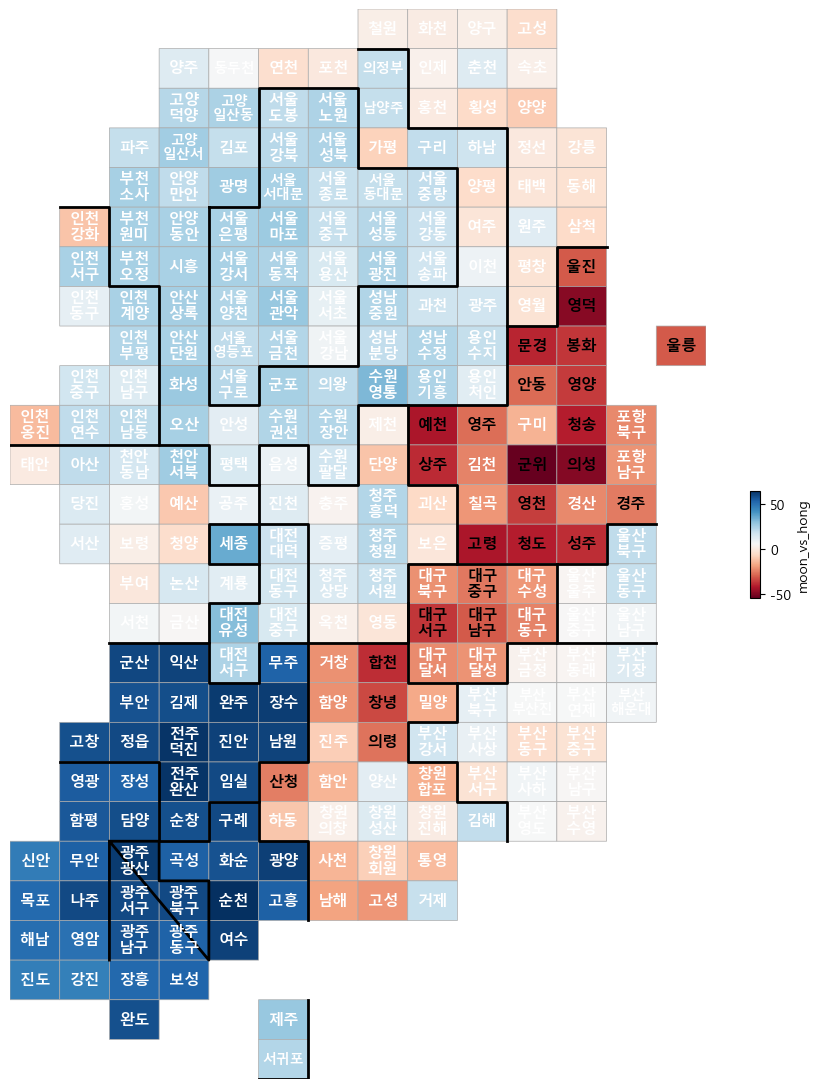

In [78]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

C:\Users\niceq\AppData\Local\Temp\ipykernel_20800\1281317803.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


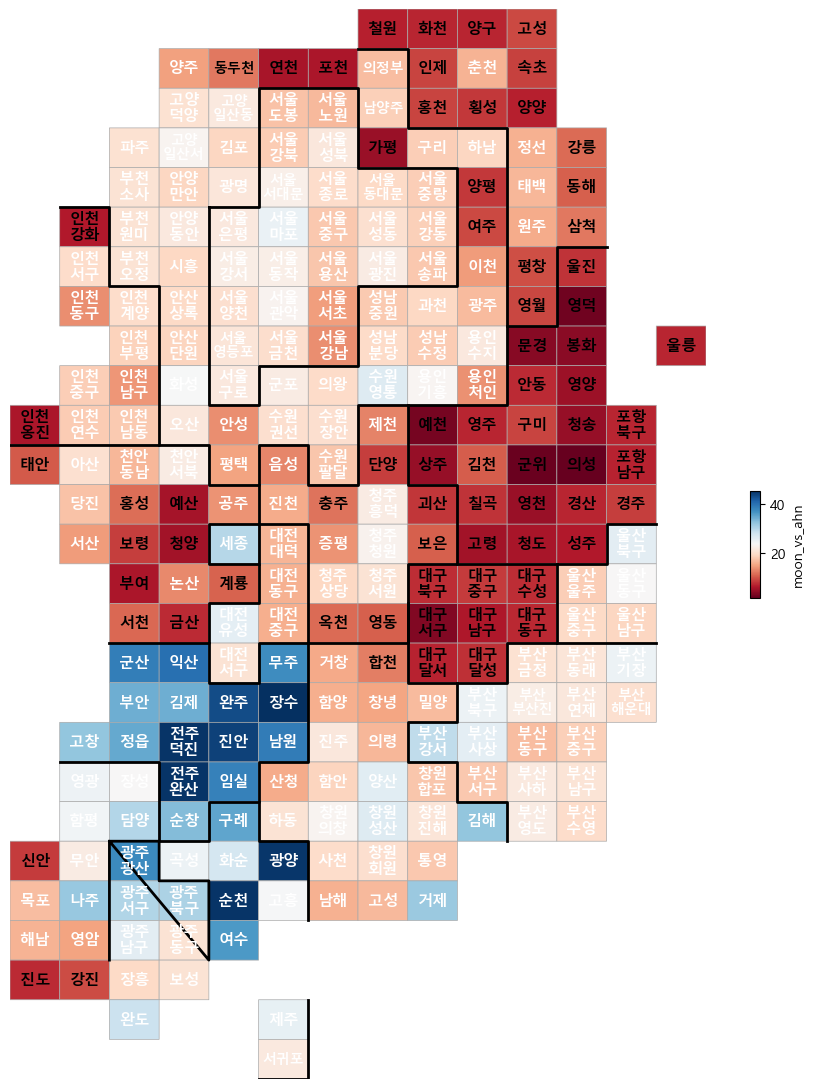

In [79]:
drawKorea('moon_vs_ahn', final_elect_data, 'RdBu')

C:\Users\niceq\AppData\Local\Temp\ipykernel_20800\1281317803.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


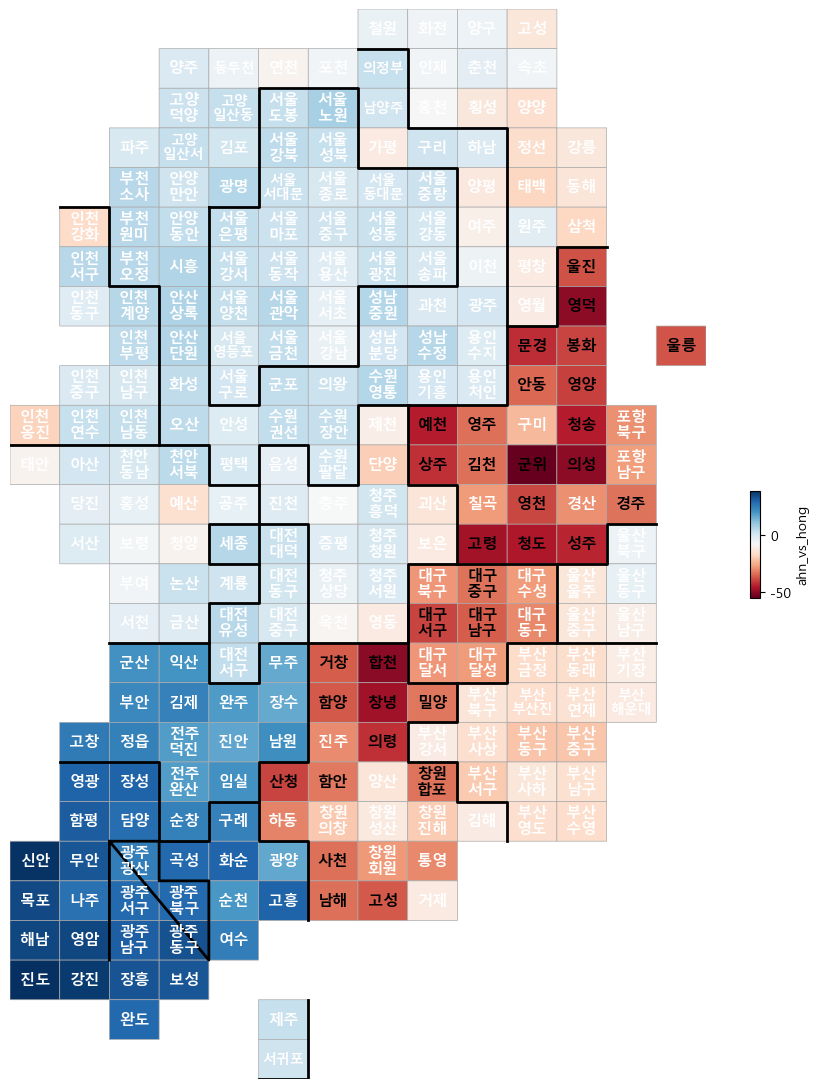

In [80]:
drawKorea('ahn_vs_hong', final_elect_data, 'RdBu')

In [81]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [82]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군']

pop_folium.head()

,pop,moon,hong,ahn,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
ID,,,,,,,,,,,,
서울 종로,102566.0,42512.0,22325.0,22313.0,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
서울 중구,82852.0,34062.0,17901.0,19372.0,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
서울 용산,148157.0,58081.0,35230.0,32109.0,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
서울 성동,203175.0,86686.0,40566.0,45674.0,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
서울 광진,240030.0,105512.0,46368.0,52824.0,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [83]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=6)
folium.Choropleth(geo_data = geo_data,
               data = pop_folium['moon_vs_hong'],
               columns = [pop_folium.index, pop_folium['moon_vs_hong']],
               fill_color = 'PuBu', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)
map